In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import load_model

from sklearn import datasets
# from sklearn.decomposition import PCA
# from sklearn.svm import SVC
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV

from art.estimators.classification import KerasClassifier
from art.attacks.evasion import BasicIterativeMethod

from art.config import ART_DATA_PATH
from art.utils import load_dataset, get_file
from art.estimators.classification import SklearnClassifier
# from art.attacks.evasion import HopSkipJump
from hop_skip_jump import HopSkipJump
from art.attacks.evasion import FastGradientMethod

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [2]:
# MNIST
(x_train, y_train), (x_test, y_test), min_, max_ = load_dataset('mnist')


path = get_file('mnist_cnn_original.h5', extract=False, path=ART_DATA_PATH,
                url='https://www.dropbox.com/s/p2nyzne9chcerid/mnist_cnn_original.h5?dl=1')
classifier_model = load_model(path)
classifier = KerasClassifier(clip_values=(min_, max_), model=classifier_model, use_logits=False)

num = 100
classifier_model.summary()
x_test_pred = np.argmax(classifier.predict(x_test[:num]), axis=1)
nb_correct_pred = np.sum(x_test_pred == np.argmax(y_test[:num], axis=1))

print(f"Original test data (first {num} images):")
print("Correctly classified: {}".format(nb_correct_pred))
print("Incorrectly classified: {}".format(num-nb_correct_pred))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

In [3]:
from fast_gradient_sign_method import FastGradientSignMethod

attacker = FastGradientSignMethod(classifier, eps=0.5, batch_size = 8)
x_test_adv = attacker.generate_targeted_iterative(x_test[:num], x_test[0]) 
x_test_adv_pred = np.argmax(classifier.predict(x_test_adv), axis=1)
nb_correct_adv_pred = np.sum(x_test_adv_pred == np.argmax(y_test[:num], axis=1))
print(f"Adversarial test data (first {num} images):")
print("Correctly classified: {}".format(nb_correct_adv_pred))
print("Incorrectly classified: {}".format(num-nb_correct_adv_pred))
nb_preb_as_tar = np.count_nonzero(x_test_adv_pred == np.argmax(y_test[:num], axis=1)[0])
print(f"Classified as targeted label: {nb_preb_as_tar}\n\n")

print(x_test_adv_pred)
print(np.argmax(y_test[:num], axis=1))

current_esp: 0.5000000000000001
current_esp: 0.5000000000000001
current_esp: 0.5000000000000001
current_esp: 0.5000000000000001
current_esp: 0.5000000000000001
current_esp: 0.5000000000000001
current_esp: 0.5000000000000001
current_esp: 0.5000000000000001
current_esp: 0.5000000000000001
current_esp: 0.5000000000000001
current_esp: 0.5000000000000001
current_esp: 0.5000000000000001
current_esp: 0.5000000000000001
Adversarial test data (first 100 images):
Correctly classified: 100
Incorrectly classified: 0
Classified as targeted label: 15


[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


In [4]:
# CIFAR10
(x_train, y_train), (x_test, y_test), min_, max_ = load_dataset('cifar10')
path = get_file('cifar_resnet.h5',extract=False, path=ART_DATA_PATH,
                url='https://www.dropbox.com/s/ta75pl4krya5djj/cifar_resnet.h5?dl=1')
classifier_model = load_model(path)


test_num = 100
adv_num = 100

classifier = KerasClassifier(clip_values=(min_, max_), model=classifier_model, use_logits=False)

classifier_model.summary()
x_test_pred = np.argmax(classifier.predict(x_test[:test_num]), axis=1)
nb_correct_pred = np.sum(x_test_pred == np.argmax(y_test[:test_num], axis=1))
print(f"Original test data (first {test_num} images):")
print("Correctly classified: {}".format(nb_correct_pred))
print("Incorrectly classified: {}".format(test_num-nb_correct_pred))

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 16)   64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 32, 32, 16)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

Original test data (first 100 images):
Correctly classified: 81
Incorrectly classified: 19


In [5]:
attacker = FastGradientSignMethod(classifier, eps=0.5, batch_size = 8)
x_test_adv = attacker.generate_targeted_iterative(x_test[:num], x_test[0]) 
x_test_adv_pred = np.argmax(classifier.predict(x_test_adv), axis=1)
nb_correct_adv_pred = np.sum(x_test_adv_pred == np.argmax(y_test[:num], axis=1))
print(f"Adversarial test data (first {num} images):")
print("Correctly classified: {}".format(nb_correct_adv_pred))
print("Incorrectly classified: {}".format(num-nb_correct_adv_pred))
nb_preb_as_tar = np.count_nonzero(x_test_adv_pred == np.argmax(y_test[:num], axis=1)[0])
print(f"Classified as targeted label: {nb_preb_as_tar}\n\n")

print(x_test_adv_pred)
print(np.argmax(y_test[:num], axis=1))

current_esp: 0.5000000000000001
current_esp: 0.5000000000000001
current_esp: 0.5000000000000001
current_esp: 0.5000000000000001
current_esp: 0.5000000000000001
current_esp: 0.5000000000000001
current_esp: 0.5000000000000001
current_esp: 0.5000000000000001
current_esp: 0.5000000000000001
current_esp: 0.5000000000000001
current_esp: 0.5000000000000001
current_esp: 0.5000000000000001
current_esp: 0.5000000000000001
Adversarial test data (first 100 images):
Correctly classified: 65
Incorrectly classified: 35
Classified as targeted label: 11


[3 8 8 1 1 6 1 1 3 1 5 9 5 7 9 8 5 1 8 6 7 0 4 1 5 2 1 0 9 6 6 5 4 1 9 1 4
 1 9 5 1 1 5 6 0 9 3 1 7 6 1 8 1 3 8 8 7 1 3 3 7 3 1 1 1 2 1 1 1 4 1 6 8 8
 1 2 9 3 5 8 1 1 1 7 3 5 5 1 8 1 1 3 8 6 4 3 1 1 0 7]
[3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6 7 0 4 9 5 2 4 0 9 6 6 5 4 5 9 2 4
 1 9 5 4 6 5 6 0 9 3 9 7 6 9 8 0 3 8 8 7 7 4 6 7 3 6 3 6 2 1 2 3 7 2 6 8 8
 0 2 9 3 3 8 8 1 1 7 2 5 2 7 8 9 0 3 8 6 4 6 6 0 0 7]


Original test data (first 100 images):
Correctly classified: 81
Incorrectly classified: 19


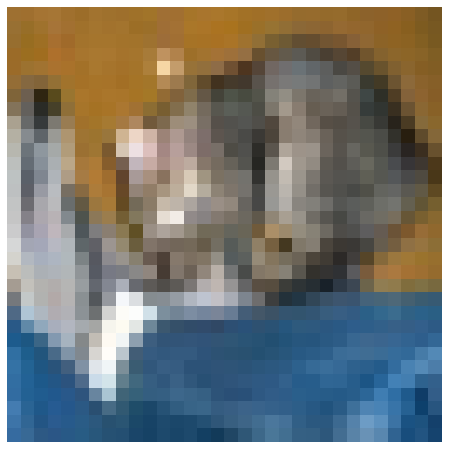

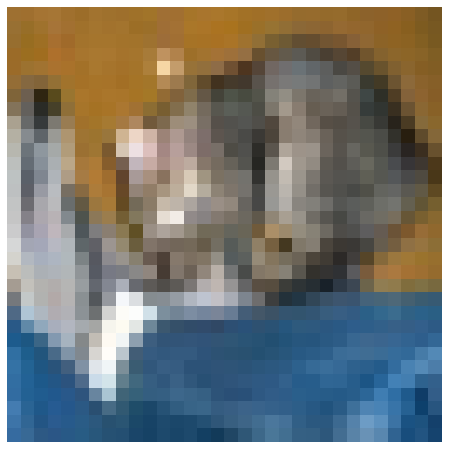

Adversarial test data (first 100 images):
Correctly classified: 65
Incorrectly classified: 35
Classified as targeted label: 11




In [17]:
x_test_pred = np.argmax(classifier.predict(x_test[:test_num]), axis=1)
nb_correct_pred = np.sum(x_test_pred == np.argmax(y_test[:test_num], axis=1))
print(f"Original test data (first {test_num} images):")
print("Correctly classified: {}".format(nb_correct_pred))
print("Incorrectly classified: {}".format(test_num-nb_correct_pred))

from defence.SSmoothing import SpatialS
img = []

plt.figure(figsize=(8,8)); plt.imshow(x_test_adv[0]); plt.axis('off'); plt.show()

for i in range(len(x_test_adv)):
    x_dev_def = SpatialS(np.moveaxis(x_test_adv[i], 2, 0), window_size=3, way="rmin")
    img.append(np.moveaxis(x_dev_def, 0, 2))
    
x_dev_def = np.array(img)

plt.figure(figsize=(8,8)); plt.imshow(x_dev_def[0]); plt.axis('off'); plt.show()

x_test_adv_pred = np.argmax(classifier.predict(x_dev_def), axis=1)
nb_correct_adv_pred = np.sum(x_test_adv_pred == np.argmax(y_test[:num], axis=1))
print(f"Adversarial test data (first {num} images):")
print("Correctly classified: {}".format(nb_correct_adv_pred))
print("Incorrectly classified: {}".format(num-nb_correct_adv_pred))
nb_preb_as_tar = np.count_nonzero(x_test_adv_pred == np.argmax(y_test[:num], axis=1)[0])
print(f"Classified as targeted label: {nb_preb_as_tar}\n\n")

In [25]:
# DEFENCE
import defence.detector as detector
x_train_adv = attacker.generate_targeted_iterative(x_train[:100], x_test[0]) 
dmodel = detector.build_detector(classifier_model)
detector.train(dmodel, x_train[:100], x_train_adv)
detector.result(dmodel, x_test, x_test_adv)
# x_art_def = SpatialS(np.moveaxis(x_art[0][..., ::-1], 2, 0), window_size=3, way="mean")
# x_art_def = np.expand_dims(np.moveaxis(x_art_def, 0, 2), axis=0)[..., ::-1] 
# x_art_adv_def = SpatialS(np.moveaxis(x_art_adv[0][..., ::-1], 2, 0), window_size=3, way="0.5mean")
# x_art_adv_def = np.expand_dims(np.moveaxis(x_art_adv_def, 0, 2), axis=0)[..., ::-1] 

current_esp: 0.05
current_esp: 0.05
current_esp: 0.5000000000000001
current_esp: 0.05
current_esp: 0.05
current_esp: 0.05
current_esp: 0.05
current_esp: 0.05
current_esp: 0.05
current_esp: 0.05
current_esp: 0.05
current_esp: 0.05
current_esp: 0.05
Train on 200 samples
Epoch 1/20
200/200 [==============================] - 0s 5us/sample - loss: 3.6482 - accuracy: 0.5025
Epoch 2/20
200/200 [==============================] - 0s 5us/sample - loss: 0.3059 - accuracy: 0.9700
Epoch 3/20
200/200 [==============================] - 0s 5us/sample - loss: 0.1258 - accuracy: 0.9925
Epoch 4/20
200/200 [==============================] - 0s 5us/sample - loss: 0.0860 - accuracy: 0.9975
Epoch 5/20
200/200 [==============================] - 0s 10us/sample - loss: 0.1226 - accuracy: 0.9950
Epoch 6/20
200/200 [==============================] - 0s 10us/sample - loss: 0.1216 - accuracy: 0.9950
Epoch 7/20
200/200 [==============================] - 0s 10us/sample - loss: 0.1213 - accuracy: 0.9950
Epoch 8/20
200

0